# Analisi SQUAT
> Decision TreeClassifier

> Logistic Regression 

> Regressione lineare multivariata

In [448]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn import tree
from matplotlib import pyplot as plt
import seaborn as sns

In [449]:
max_lunghezza_albero = 100
potatura = 0.001

shift = 5
soglia_p = 0.7
rolling_p = 3

## Import dati

In [450]:
df = pd.read_csv('/Users/paoloartasensi/Python_Scripts/artabax/Squatprob.csv' , sep=';' , decimal='.')
df.set_index('Time', inplace=True)
df

,Ax,Ay,Az,Gx,Gy,Gz,BAR,P,R,Mag,UP,DOWN,prob
Time,,,,,,,,,,,,,
0,9.96568,1.54000,-1.07536,0.21,-0.14000,-0.91,994.81836,0,0,0,0,0,0.06182
1,9.99921,1.50168,-1.31966,1.96,0.21000,-0.28,994.82104,0,0,0,0,0,0.05775
2,9.93694,1.59748,-1.21188,1.19,3.85000,0.91,994.82178,0,0,0,0,0,0.05835
3,10.02316,1.64059,-1.12805,-1.05,2.87000,-4.97,994.82007,0,0,0,0,0,0.06276
4,10.06627,1.67651,-1.10889,0.14,2.73000,-2.03,994.81763,0,0,0,0,0,0.06619
...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,9.56331,1.71244,2.98180,5.32,19.73999,5.46,994.85303,0,0,0,0,0,0.20285
578,10.72969,1.76752,3.47757,-4.20,18.19999,10.43,994.84375,0,0,0,0,0,0.52341
579,10.81830,1.82740,3.57816,-10.15,16.79999,15.12,994.84375,0,0,0,0,0,0.57682


In [451]:
df['prob'] = df['prob'].rolling(rolling_p).mean()

In [452]:
df['prob'].loc[df['prob'] >= soglia_p] = 1
df['prob'].loc[df['prob'] < soglia_p] = 0

/var/folders/3c/slz2lm7j261c98fw2gd6wrz00000gp/T/ipykernel_74853/3714176372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prob'].loc[df['prob'] >= soglia_p] = 1
/var/folders/3c/slz2lm7j261c98fw2gd6wrz00000gp/T/ipykernel_74853/3714176372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prob'].loc[df['prob'] < soglia_p] = 0


In [453]:
# applico uno shift per ogni posizione i con ['DOWN']==1, 
# assegno alle righe prima e dopo ['DOWN']=1
# numero di righe determinato da [shift]

df_temp = df.loc[df['DOWN'] ==1]
pos = np.array(df_temp.index)

for i in pos:
    for k in range(-shift+1, shift, 1):
        df.at[i+k, 'DOWN'] =1


df_temp2 = df.loc[df['prob'] ==1]
pos2 = np.array(df_temp2.index)

for i in pos2:
    for k in range(-shift+1, shift, 1):
        df.at[i+k, 'prob'] =1

df.dropna(inplace=True)

In [454]:
df

,Ax,Ay,Az,Gx,Gy,Gz,BAR,P,R,Mag,UP,DOWN,prob
Time,,,,,,,,,,,,,
2,9.93694,1.59748,-1.21188,1.19,3.85000,0.91,994.82178,0,0,0,0,0,0.0
3,10.02316,1.64059,-1.12805,-1.05,2.87000,-4.97,994.82007,0,0,0,0,0,0.0
4,10.06627,1.67651,-1.10889,0.14,2.73000,-2.03,994.81763,0,0,0,0,0,0.0
5,10.17883,1.81063,-0.98914,-2.66,2.80000,-5.39,994.81006,0,0,0,0,0,0.0
6,9.92257,1.80824,-1.05620,0.00,-5.32000,-2.17,994.77954,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,9.56331,1.71244,2.98180,5.32,19.73999,5.46,994.85303,0,0,0,0,0,0.0
578,10.72969,1.76752,3.47757,-4.20,18.19999,10.43,994.84375,0,0,0,0,0,0.0
579,10.81830,1.82740,3.57816,-10.15,16.79999,15.12,994.84375,0,0,0,0,0,0.0


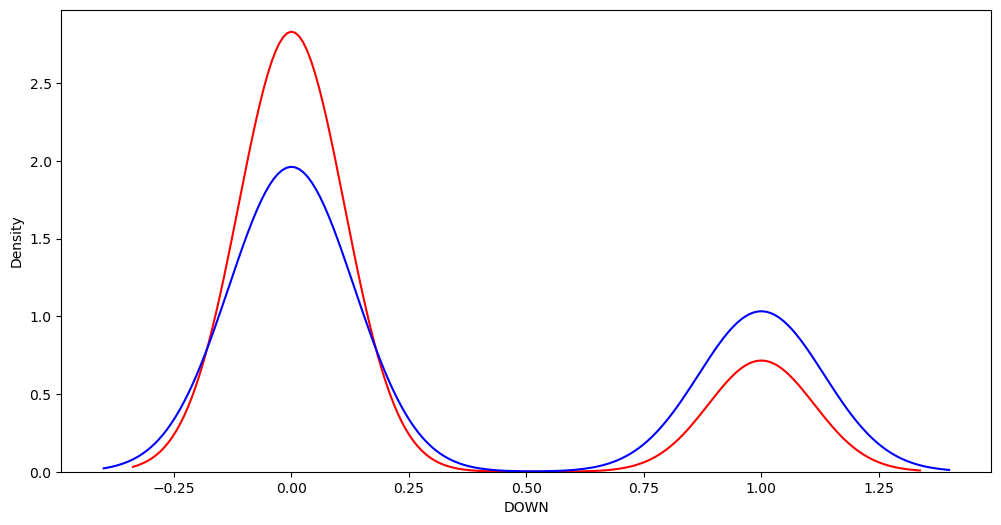

In [455]:
plt.figure(figsize=(12,6))
sns.kdeplot(df['DOWN'], color='red')
sns.kdeplot(df['prob'], color='blue')
plt.show()

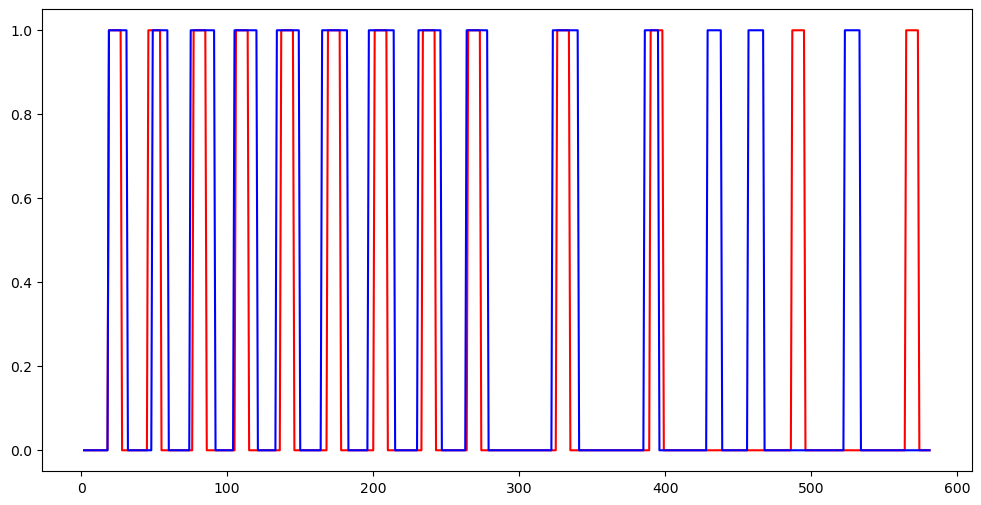

In [456]:
plt.figure(figsize=(12,6))
plt.plot(df['DOWN'], color='red')
plt.plot(df['prob'], color='blue')
plt.show()

## Preparazione datasets

In [457]:
## Y è l'output che utilizziamo come training
## X sono le feautures, BISOGNA togliere la Y dalle colonne feautures 
y = df['DOWN']
X = df.copy()
X.drop(columns=['DOWN','Mag','UP','prob'], axis=1, inplace=True)

##Divido il campione in Train e Test
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Modelli

## DecisionTree Classifier

In [458]:
potatura = 0.005

In [459]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=max_lunghezza_albero , ccp_alpha=potatura)
clf = clf.fit(X_train, y_train)
param = clf.get_params()
predictions = clf.predict(X_test)
accuracy = clf.score(X_train, y_train)
precision = precision_score(y_true= y_test, y_pred=predictions)
recall = recall_score(y_true= y_test, y_pred=predictions)

print('Accuracy:  ', round(accuracy,3))
print('Precision: ', round(precision,3))
print('Recall:    ', round(recall,3))

from sklearn import tree
feature_names = X.columns
fig = plt.figure(figsize=(30,20))
_= tree.plot_tree(clf, 
        feature_names=feature_names, 
        filled=True, fontsize=15)


Accuracy:   0.955
Precision:  0.762
Recall:     0.593


In [ ]:
##importanza features
feature_names = X.columns
feature_importance = pd.DataFrame(clf.feature_importances_, index=feature_names).sort_values(0, ascending=False)

print(feature_importance.head(10))
important_features = list(feature_importance[feature_importance[0]>0].index)
# feature_importance.head(10).plot(kind='bar')

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('DecisionTree EVALUATION' +' | shift:'+str(shift))
sns.kdeplot(data=df, x='DOWN' , label='Valori Reali')
sns.kdeplot(predictions , label='Valori stimati')
plt.legend()
plt.show()

## Logistic Regression

In [ ]:
log_reg = LogisticRegression(random_state=None, solver = 'lbfgs', max_iter=10000)
log_reg.fit(X_train, y_train)

# predict - Predict class labels for samples in X
y_pred = log_reg.predict(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

lr = pd.DataFrame(data =[X_train.columns, np.array(log_reg.coef_[0]).tolist()]).T
lr.rename(columns={0:'Reg',1:'Logistic'}, inplace=True)
lr.set_index('Reg', inplace=True)
lr.sort_values(by='Logistic', key=abs, ascending=False , inplace=True)
print(lr)
print('Termine noto:',log_reg.intercept_[0])

In [ ]:
'''Logistic Regression EVALUATION'''

# Accuracy on Train
print("LogReg Training Accuracy is: ", log_reg.score(X_train, y_train))
# Accuracy on Test
print("LogReg Testing Accuracy is: ", log_reg.score(X_test, y_test))
# Classification Report


In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Logistic Regression EVALUATION' +' | shift:'+str(shift))
sns.kdeplot(data=df, x='DOWN' , label='Valori Reali')
sns.kdeplot(y_pred , label='Valori stimati')
plt.legend()
plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="coolwarm_r", 
                    xticklabels=classes, 
                    yticklabels=classes, 
                    vmin=0., vmax=1., 
                    annot=True, annot_kws={'size':30}
                    )
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Visualizing cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [ ]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)

## Regressione Lineare Multivariata

In [ ]:
mlr = LinearRegression()
y = df['DOWN']
X = df.copy()
X.drop(columns=['DOWN','Mag','UP'], axis=1, inplace=True)

mlr.fit(X, y)
Y_hat = mlr.predict(X)
b0 = mlr.coef_
b1 = mlr.intercept_

reg = pd.DataFrame(data =[X.columns, b0]).T
reg.rename(columns={0:'Reg',1:'RLM'}, inplace=True)
reg.set_index('Reg', inplace=True)
reg.sort_values(by='RLM', key=abs, ascending=False , inplace=True)

print(reg)
print('Termine noto:',b1)
print(' ')
print('Precisione: ', mlr.score(X, y))

plt.figure(figsize=(8, 6))
plt.title('Reg Lineare Multivariata EVALUATION' +' | shift:'+str(shift))
sns.kdeplot(data=df, x='DOWN' , label='Valori Reali')
sns.kdeplot(Y_hat , label='Valori stimati')
plt.legend()
plt.show()
